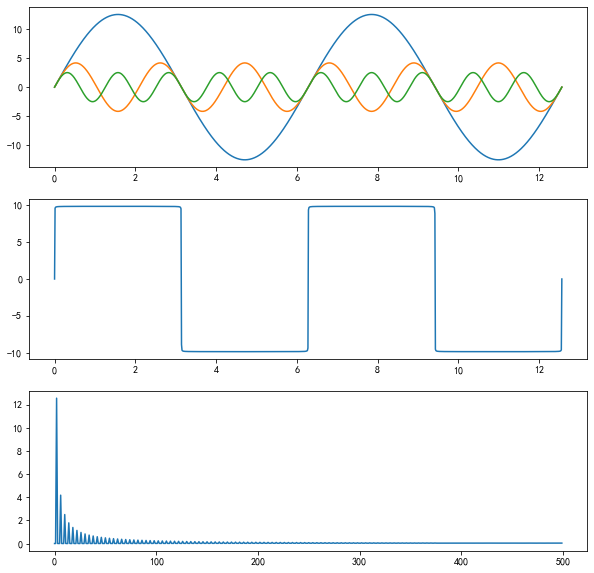

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
 
x = np.linspace(0,np.pi*4,1000)
f1 = 4*np.pi*np.sin(x)
f2 = 4/3*np.pi*np.sin(3*x)
f3= 4/5*np.pi*np.sin(5*x)

n = 1000
f = np.zeros(n)
for i in range(1,n+1):
    f += 4/(2*i-1)*np.pi*np.sin((2*i-1)*x)

N=1000
Fs=1000
freq = np.arange(N) / N * Fs

Y = np.fft.fft(f)/(N/2)

Y[0] = Y[0] / 2
freq_half = freq[range(int(N/2))]
Y_half = Y[range(int(N/2))]
fig,ax= plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(x,f1)
ax[0].plot(x,f2)
ax[0].plot(x,f3)
ax[1].plot(x,f)
ax[2].plot(freq_half, abs(Y_half))

NameError: name 'array' is not defined

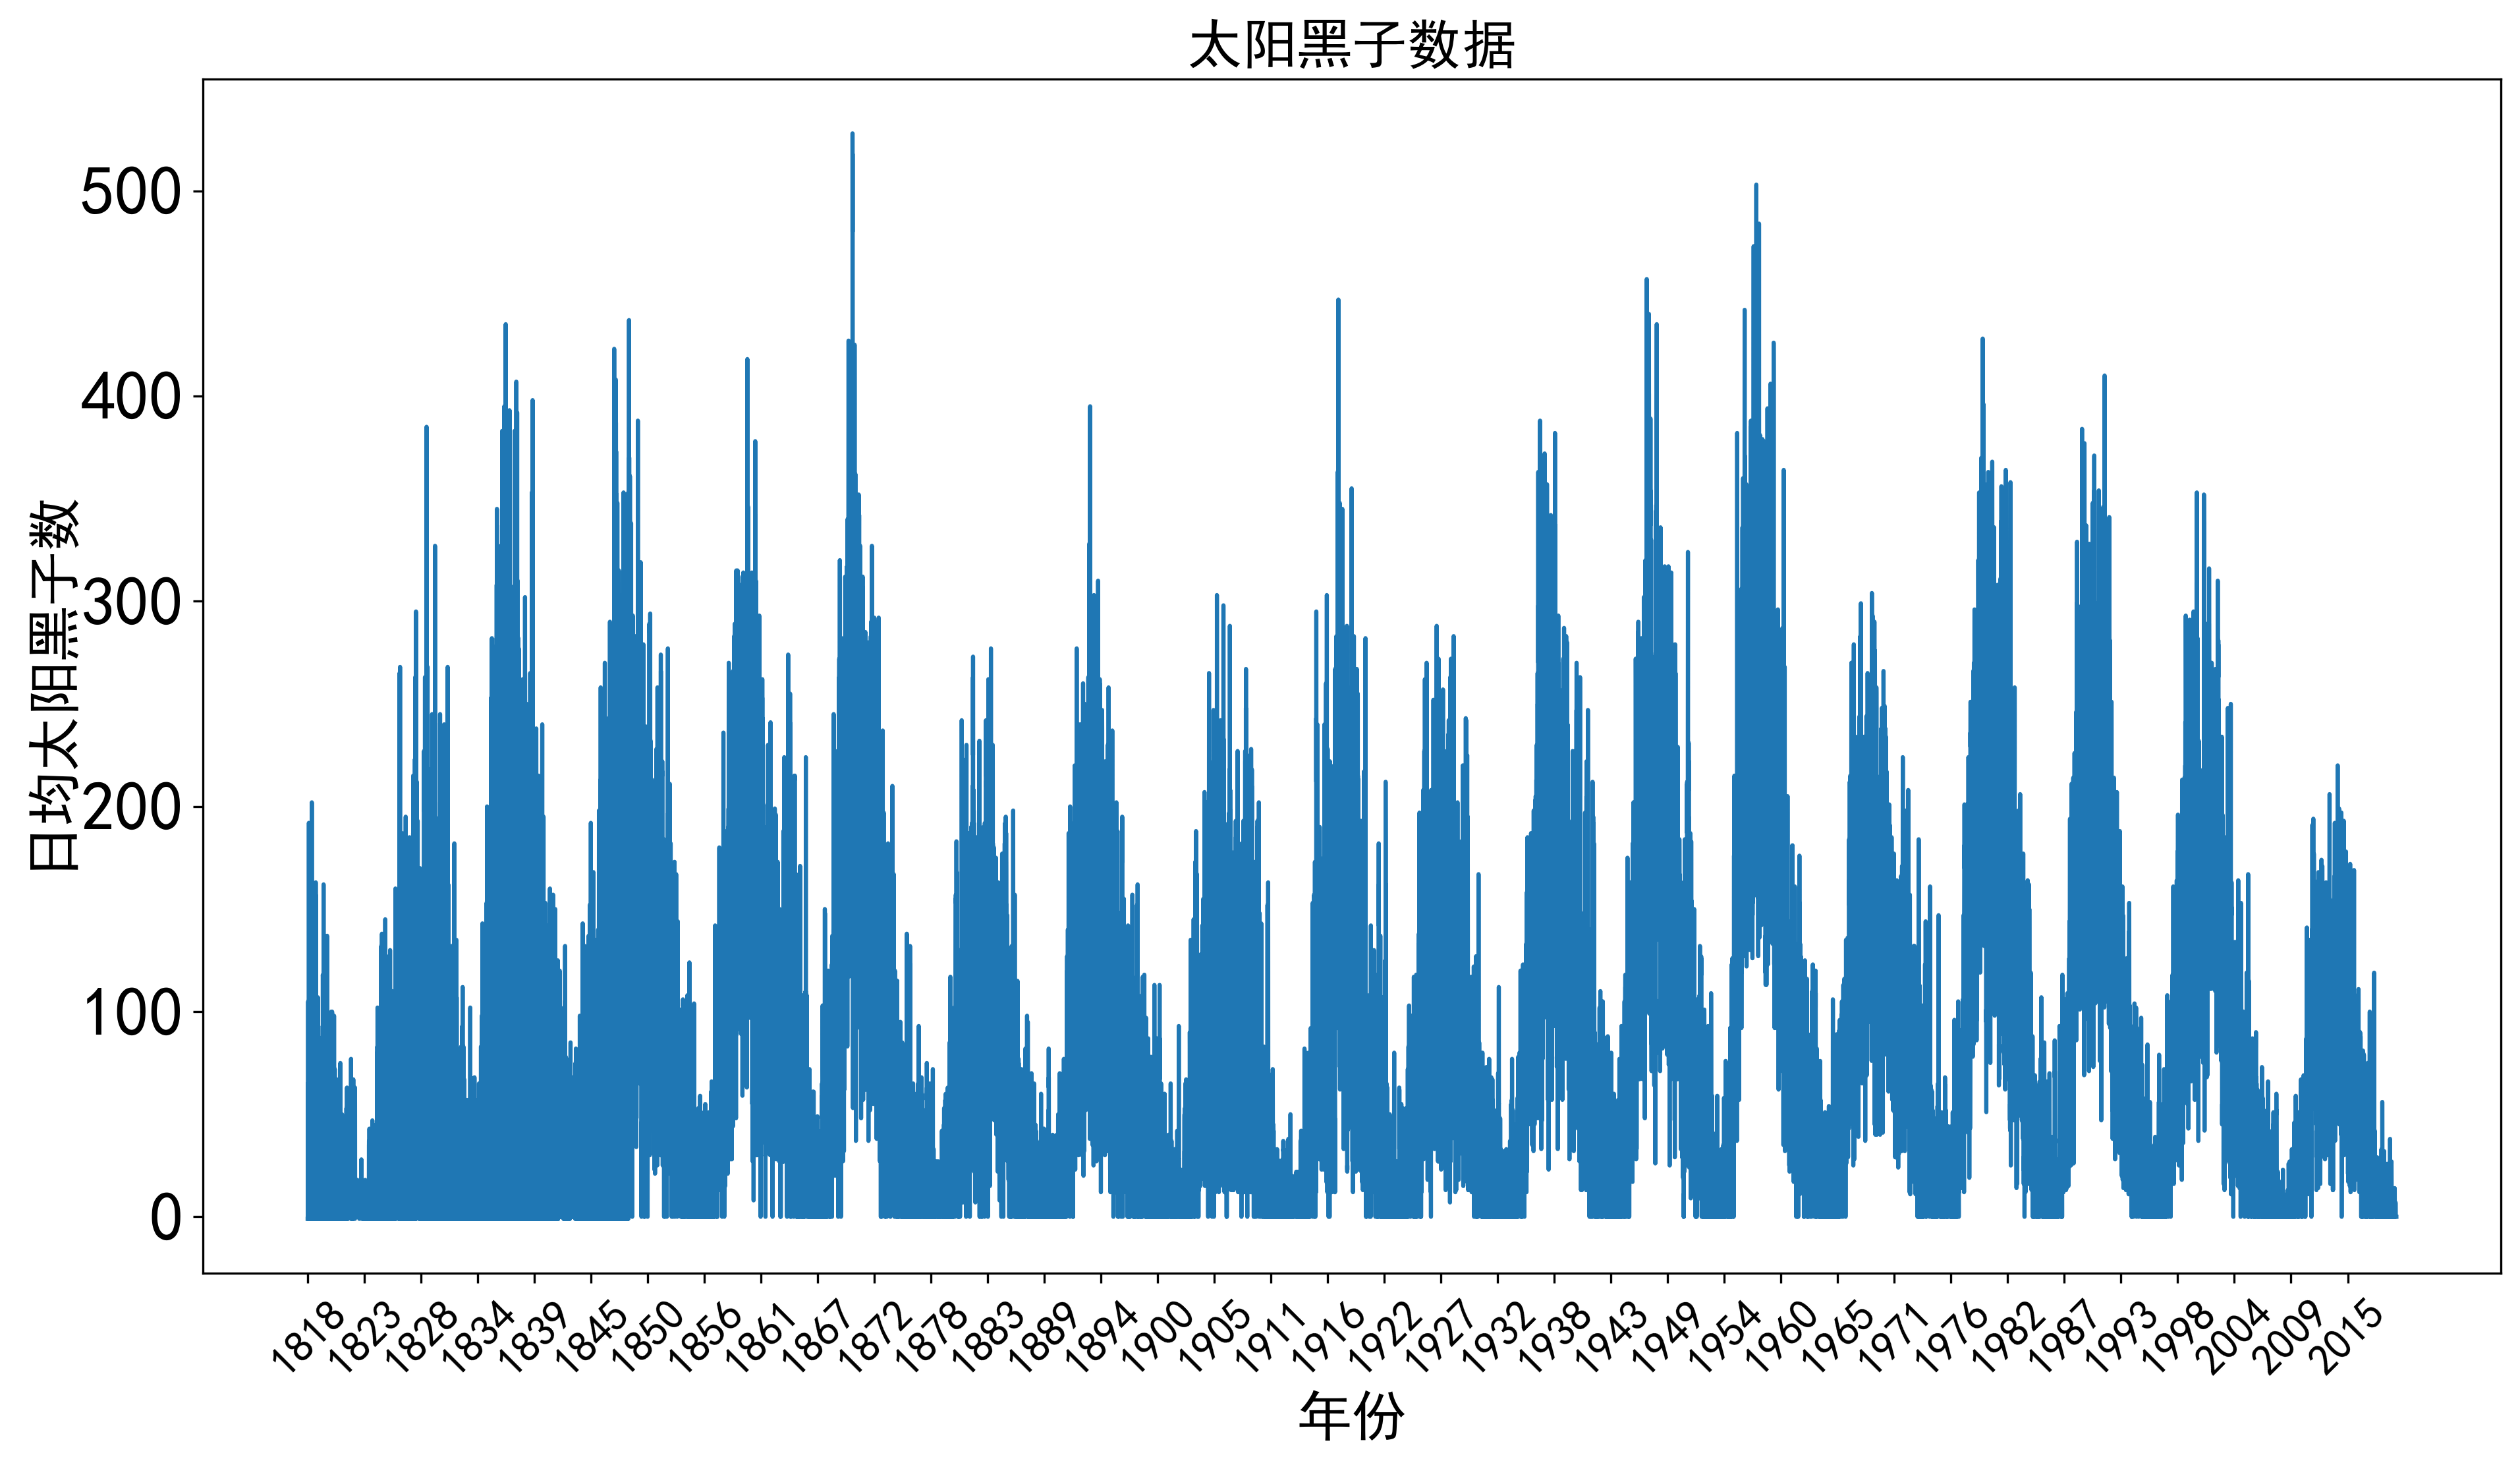

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft 
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 
%matplotlib inline 

data = np.loadtxt('sunspot_data(1).csv',skiprows=1,delimiter=',')
day = np.arange(1,len(data[:,4])+1,1) 
sunspot = data[:,5]
plt.figure(figsize=(15,8),dpi=300)
plt.plot(day,sunspot)

plt.xlabel('年份',fontsize=20)
plt.ylabel('日均太阳黑子数',fontsize=20)
plt.title('太阳黑子数据',fontsize=20)

x_year = []
for i in range(0,len(day),2000): 
    x_year.append(int(data[i,4]))
plt.xticks(range(0,len(day),2000),x_year,rotation=45,fontsize=16)
plt.yticks(fontsize=25)
(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])


NameError: name 'array' is not defined

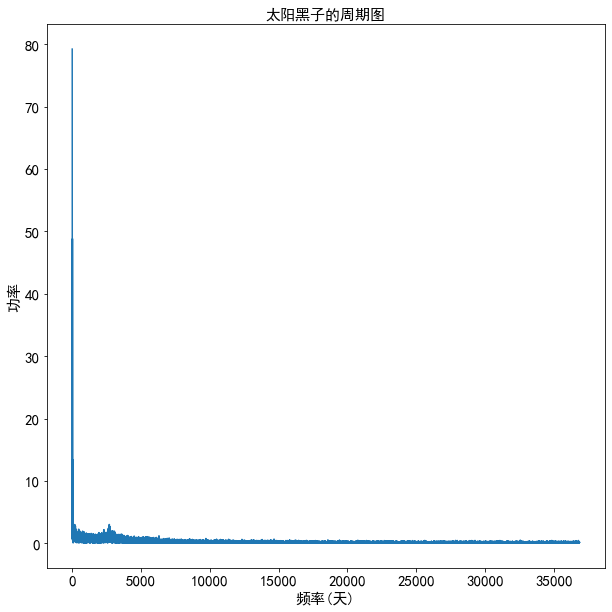

In [15]:
N=len(day)
Fs=len(day)

freq = np.arange(N) / N * Fs

Y = np.fft.fft(sunspot)/(N/2)

Y[0] = Y[0] / 2
freq_half = freq[range(int(N/2))]
Y_half = Y[range(int(N/2))]

fig,ax= plt.subplots(1, 1, figsize=(10, 10))
power=abs(Y_half)
ax.plot(freq_half, power)

plt.title('太阳黑子的周期图',fontsize=15)
plt.xlabel('频率(天)',fontsize=15)
plt.ylabel('功率',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [ ]:
import wave
import numpy as np
import scipy.signal as signal

framerate = 44100
time = 10

t = np.arange(0, time, 1.0/framerate)
wave_data = signal.chirp(t,f0=293.67,t1=10,f1=293.67, method='linear') * 1000
wave_data = wave_data.astype(np.short)

f = wave.open(r"fa.wav", "wb")

f.setnchannels(1)
f.setsampwidth(2)
f.setframerate(framerate)
f.writeframes(wave_data.tostring())
f.close()

<ipython-input-1-71ae73af7a12>:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


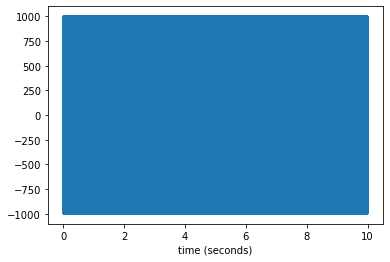

In [1]:
import wave
import pylab as pl
import numpy as np

# 打开WAV文档
f = wave.open("fa.wav", "rb")

# 读取格式信息
# (nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

# 读取波形数据
str_data = f.readframes(nframes)
f.close()

#将波形数据转换为数组
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1,1
time = np.arange(0, nframes) * (1.0 / framerate)

# 绘制波形
pl.subplot(111) 
pl.plot(time, wave_data)
pl.xlabel("time (seconds)")
pl.show()

            5             4             3            2
-3.883e-11 x + 4.405e-08 x - 7.767e-06 x + 6.65e-05 x + 0.03083 x + 0.04921


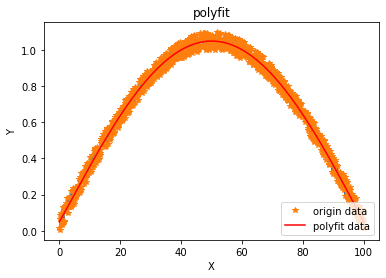

(4.671818487622659e-16, 0.02931226752349986)

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(0, 100, 1000)
y = np.sin(x*np.pi/100)
# z=y
noise = np.random.random(1000)
y = y + noise/10
plt.plot(x,y)

z1 = np.polyfit(x, y, 5)
# 使用poly1d方法获得多项式系数,按照阶数由高到低排列
p1 = np.poly1d(z1)
# 在屏幕上打印拟合多项式
print(p1)
# 求对应x的各项拟合函数值
fx = p1(x)
# 绘制坐标系散点数据及拟合曲线图
plot1 = plt.plot(x, y, '*', label='origin data')
plot2 = plt.plot(x, fx, 'r', label='polyfit data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=4)  # 指定legend的位置,类似象限的位置
plt.title('polyfit')
plt.show()
plt.savefig('polyfit.png')


noise=y-p1(x)
np.mean(noise),np.std(noise)

In [2]:
import numpy as np
cj = np.loadtxt('score.csv',dtype=str,delimiter=',',skiprows=1)
dicts={}
for i in range(65):
    rules=int(cj[i][2])+int(cj[i][3])+int(cj[i][4])+int(cj[i][5])
    keys=cj[i][1]
    dicts[keys]=rules
print(dicts)

OSError: score.csv not found.

In [ ]:
import random
import math

def fu(c):
    if c>=0.55:
        print("Y")
    else:
        print("N")
    

for i in range(10):
    x = random.random() / 10.+0.5
    y = random.random() / 10.
    z = math.sqrt(x**2+y**2)
#     print("%7.5f,%9.6f,%10.6f"%(x,y,z))
    print("%7.5f,%1f,%9.6f,%1f,%10.6f,%1f"%(x,fu(x),y,fu(y),z,fu(z)))

扑克牌练习（Spade黑桃、Heart红心、diamond方块、Crystal梅花）如下：

In [42]:
import random
import math

S_set = set(range(1,14))
H_set = set(range(14,27))
D_set = set(range(27,40))
C_set = set(range(40,53)) 

cards=[]
huang=[]
for i in range(1,53):
    a = i
    cards.append(a)

random.shuffle(cards)

for i in range(52):
    if i%4==0:
        a=cards[i]
        huang.append(a)

huang.sort()
a_set = set(huang)



{32, 33, 34, 35, 36, 37, 38, 39, 27, 28, 29, 30, 31}


In [50]:
# huang=[1,4,5,9,8,9,1]
# a_set = set(huang)
# print(a_set)

a_set = set(range(7,13))
b_set = set(range(7,13))
print(a_set)
print(b_set)
print(a_set-b_set==set())

{7, 8, 9, 10, 11, 12}
{7, 8, 9, 10, 11, 12}
True


再别康桥中英文

In [ ]:
file = open("zbkq.txt","r",encoding="utf-8")
file1 = open("中文版.txt","w")      # w表示在重新创造文件
file2 = open("英文版.txt","w")
# while True:
#     a = file.readline()
#     if a =='':
#         break
#     print(a)
a=file.readlines()
print(a)
for i in range(len(a)-1):
    print(a[i].split("\t")[0])       # [0]表示切片后位于0位置的切片
    file1.write(a[i].split("\t")[0]+"\n")
for i in range(len(a)-1):
    print(a[i].split("\t")[1])
    file2.write(a[i].split("\t")[1])    # write指写入对于的内容

file.close()
file1.colse()
file2.close()